## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [41]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [42]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [43]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [44]:
#divide unique number of "converted" "user_id" with the overall number of unique number of "user_id"
user_con_p = df[df["converted"]==1].user_id.nunique()/df.user_id.nunique()
user_con_p

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [45]:
#use boolean to get number of rows where "new page" and "treatment don't line up"
misalign_1 = df[((df["group"]=="treatment")==(df["landing_page"]=="new_page"))==False].user_id.count()
misalign_1

3893

f. Do any of the rows have missing values?

In [46]:
df[df.isnull().any(axis=1)]
#none of the rows have missing values.

,user_id,timestamp,group,landing_page,converted


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
#drop the indexes of where "new_page and "treatment" don't line up.
indexes = df[((df["group"]=="treatment")==(df["landing_page"]=="new_page"))==False].index
df2 = df.drop(indexes,axis=0)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
#Used .duplicated() function to locate duplicated row.
df2[df2.user_id.duplicated()==True]
#it is user_id 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [51]:
df2[df2.user_id==773192]
#it is row 1899 and 2893

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
#used .drop() function to drop row 2893
df2.drop(2893,axis=0)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
#number of unique individuals in df2
all_u_indiv = df2.user_id.nunique()
#number of unique individuals converted regardless of the page they received.
all_conv_indiv = df2[df2.converted==1].user_id.nunique()
#probability of individual converting. all unique converted individuals divided by 
#all unique individuals in df2
all_ind_prob = all_conv_indiv/all_u_indiv
all_ind_prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
#Query for overall control group
cont_u_indiv = df2.query("group=='control'")
#number of unique individuals in control group
cont_u_indiv_n = cont_u_indiv.user_id.nunique()
#number of converted individuals in control group
cont_conv_indiv_n = cont_u_indiv.query("converted==1").user_id.nunique()
#probability of control group converting. all converted individuals in control group divided by 
#all unique individuals in control group.
cont_conv_prob = cont_conv_indiv_n/cont_u_indiv_n
cont_conv_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
#Query for overall treatment group
treat_u_indiv = df2.query("group=='treatment'")
#number of unique individuals in treatment group
treat_u_indiv_n = treat_u_indiv.user_id.nunique()
#number of converted individuals in control group
treat_conv_indiv_n = treat_u_indiv.query("converted==1").user_id.nunique()
#probability of control group converting. all converted individuals in control group divided by 
#all unique individuals in control group.
treat_conv_prob = treat_conv_indiv_n/treat_u_indiv_n
treat_conv_prob

0.11880806551510564

Difference between the conversion rate of the control group and the treatment group

In [56]:
#difference between treatment converted and control converted
obs_diff = treat_conv_prob - cont_conv_prob
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [57]:
#number of unique individuals in df2
all_u_indiv = df2.user_id.nunique()
#number of individuals who received new page in df2
all_u_new_page = df2.query("landing_page=='new_page'").user_id.nunique()
#probability of individual receiving new page. all unique individuals receiving new page
#divided by all unique individuals in df2
u_new_page_prob = all_u_new_page/all_u_indiv 
u_new_page_prob

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

* **Since the conversion probability of the control group = 0.1204 is slightly higher than the treatment group = 1188. There is no evidence that the new treatment page leads to more conversion. The opposite may be true by a slight margin.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

* **The null hypothesis $H_0$ is that $p_{old}$ $\geq$ $p_{new}$**
* **The alternative hypothesis $H_1$ is that $p_{old}$ $\lt$ $p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [58]:
#Since p_new converted rate is equal to the overall population
#overall number of unique users in df2
overall_pop_n = df2.user_id.nunique()
#overall number of converted users in df2
overall_conv_n = df2.query("converted==1").user_id.nunique()
p_new = overall_conv_n/overall_pop_n
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [59]:
#Since p_old converted rate is equal to the overall population
#overall number of unique users in df2
overall_pop_n = df2.user_id.nunique()
#overall number of converted users in df2
overall_conv_n = df2.query("converted==1").user_id.nunique()
p_old = overall_conv_n/overall_pop_n
p_old

0.11959708724499628

c. What is $n_{new}$?

In [60]:
#get number of unique users who received the new page.
n_new = df2.query("landing_page=='new_page'").user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [61]:
#get number of unique users who received the old page.
n_old = df2.query("landing_page=='old_page'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
#simulate new_page transacations using np.random.choice, n_new and p_new probability
n_ = [0,1]
new_page_converted = np.random.choice(n_,n_new,p=[1-p_new,p_new])
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:
#simulate old_page transacations using np.random.choice, n_old and p_old probability
n_ = [0,1]
old_page_converted = np.random.choice(n_,n_old,p=[1-p_old,p_old])
old_page_converted

array([1, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
#Since the array of simulated values are 1 for conversions and 0 for non conversions,
#getting the mean of the array will generate the probability of the simulated transactions.

#probability of conversions in new_page_converted 
pnew = new_page_converted.mean()
#probability of conversions in old_page_converted
pold = old_page_converted.mean()
#difference of probability between pnew-pold
pnew - pold

-0.00045643956848341605

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [65]:
#sampling distribution
p_diffs = []


#for loop to simulate 10000 pnew-pold values.

for x in range(10000):
    
#simulate new_page transacations using np.random.choice, n_new and p_new probability
    
    new_page_converted = np.random.choice(2,n_new,p=[1-p_new,p_new])
    
#simulate old_page transacations using np.random.choice, n_old and p_old probability


    old_page_converted = np.random.choice(2,n_old,p=[1-p_old,p_old])
    
#difference of probability between pnew-pold appended to pdiffs.
    
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  12.,   67.,  498., 1641., 2961., 2856., 1466.,  428.,   68.,
           3.]),
 array([-4.84081383e-03, -3.86345526e-03, -2.88609669e-03, -1.90873813e-03,
        -9.31379561e-04,  4.59790056e-05,  1.02333757e-03,  2.00069614e-03,
         2.97805470e-03,  3.95541327e-03,  4.93277184e-03]),
 <BarContainer object of 10 artists>)

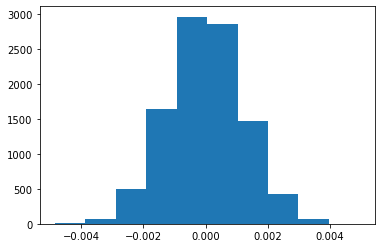

In [66]:
#make p_diffs into numpy array
p_diffs = np.array(p_diffs)
#plot p_diffs histogram
plt.hist(p_diffs)
#The plot looks like a normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

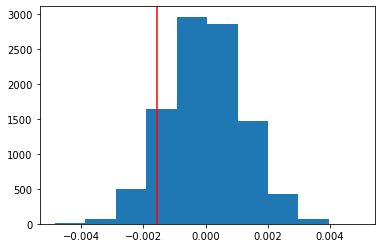

In [67]:
plt.hist(p_diffs)
#Plot axv line on the right tail using obs_diff which is the difference 
#between the conversion rate of the control group and the treatment group. We are looking
#at one tail
plt.axvline(x=obs_diff,color='red')

In [68]:
#calculate proportion of p_diffs whose values are greater 
#than the obs_diff which is around 0.0016.
(p_diffs > obs_diff).mean()

0.9024

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

* **In the equation above, we calculated the proportion of differences between the treatment group and control group in the null distribution that are greater than the calculated difference in the "ab_data" dataset. This value is called p-value. This value determines whether we should keep the null hypothesis or reject the null in favor of the alternative hypothesis. In this case since the p-value 0.90 is higher than the Type 1 error rate of 0.05, we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [69]:
import statsmodels.api as sm
#number of conversions with the old page
convert_old = df2[(df2["landing_page"]=="old_page")&(df2["converted"]==1)].user_id.nunique()
#number of conversions with the new page
convert_new = df2[(df2["landing_page"]=="new_page")&(df2["converted"]==1)].user_id.nunique()
# number of individuals who were shown the old_page
n_old = df2[df2["landing_page"]=="old_page"].user_id.nunique()
# number of individuals who were shown the new_page
n_new = df2[df2["landing_page"]=="new_page"].user_id.nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
success_old, sample_size_old = (convert_old, n_old)
success_new, sample_size_new = (convert_new, n_new)
success = np.array([success_old,success_new])
samples = np.array([sample_size_old,sample_size_new])
z_score, p_value = sm.stats.proportions_ztest(count = success,nobs = samples,alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**


* **A one-tailed test was computed.**
* **The p-value from this method was 0.91 which is larger than the Type 1 error rate of 0.05. The p-value from this is similar to the p-value in Part II j, which was 0.90**
* **The $Z_{score}$  from this method is around 1.31. It is smaller than the Type 1 Error $Z_{0.05}$ of 1.96. The $Z_{score}$ is not in the rejection region.**
* **From the p-value and z-score from this computation, we fail to reject the null. It agrees with the findings in parts J and K.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

* **Since there are only two outcomes, non-conversion or conversion a logistic regression would be performed.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [82]:
#Make intercept column of 1
df2['intercept']=1
#make dummy variable column using get_dummies, the column with new_page as 1 
#would be ab_page as the results are alphabetically ordered.
df2[['ab_page','ab_page_old']]=pd.get_dummies(df2['landing_page'])
#drop 'ab_page_old' as it has the old_page as 1. old page will be the baseline.
df2.drop(labels='ab_page_old',axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [85]:
import statsmodels.api as sm
#make logistic model using Logit
lm_1 = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
#fit the logistic model
results = lm_1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
#get summary of results of the logistic model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.6032
Date:               2022-01-08 01:25 BIC:              212801.7625
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      0.18965    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

* **The p-value associated with ab_page is 0.1897. It is different from the value in part II because the null hypothesis $H_0$ in this regression is that the ab_page(new_page) has a zero coefficient(slope). The alternative hypothesis  $H_1$ in this regression is that the ab_page (new_page) has a coefficient larger than zero. This is different from the null hypothesis in Part II where the null was $p_{new}$ = $p_{old}$ and the alternative was $p_{new}$ $\neq$ $p_{old}$**
* **The Part II hypothesis was a one-tailed test while this regression hypothesis is a two-tailed test.** 
* **The p-value of 0.1897 is higher than the type 1 error rate of 0.05. And the ab_page coefficient is -0.0150 which is near zero. We fail to reject the null hypothesis $H_0$ of this regression.**
* **Since we failed to reject the null hypothesis $H_0$ of this regression, we can conclude that the ab_page(new_page) is not more correlated to conversions compared to the baseline(old_page).**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

* **It is a good idea to consider other factors into the regression model as we are trying to find variables that influence individual converts. The more variables we check, the more likely we are to find variables that help individual conversion in the websites.**
* **The disadvantage of adding additional variables is that there may be correlated errors, non-constance variance, outliers and multicollinearity between the added variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
#import './countries.csv' make countries_df dataframe
countries_df = pd.read_csv('./countries.csv')
#join df2 with countries_df dataframe
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [88]:
### Create the necessary dummy variables
df_new[['CA', 'UK','US']] = pd.get_dummies(df_new['country'])
#drop the baseline dummy variable column
df_new.drop('US',axis = 1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0


In [90]:
#create logistic model
lm_2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
#fit logistic model
results_2 = lm_2.fit()
#get summary
results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2022-01-08 01:27 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
==================================================================

"""

* **Judging from the CA p - value of 0.1296 and UK p - value of 0.4570 which are both higher than the Type 1 Error rate of 0.05. CA has a coefficient of -0.0408 and UK has a coefficient of 0.0099 compared to the baseline US, both are near zero. Both CA and UK do not have correlation to conversions compared to the US.**
* **Country does not seem to impact conversions.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [80]:
#make interaction column between page and countries on conversion
df_new['ab_page_CA']=df_new['ab_page']*df_new['CA']
df_new['ab_page_UK']=df_new['ab_page']*df_new['UK']
#make logistic model
lm_3 = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','ab_page_CA','ab_page_UK']])
### Fit Your logistic Model And Obtain the Results
results_3 = lm_3.fit()
#get summary
results_3.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212783.1805
Date:               2022-01-08 00:46 BIC:              212836.0787
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.27294    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3154  0.0000  -2.0101  -1.9833
CA           -0.0073    0.0371    -0.1962  0.8445  -0.0799   0.0654
UK            0.0045    0.0175     0.2575  0.7968  -0.0298   0.0389
ab_page_CA   -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
ab_page_UK    0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
==================================================================

"""

* **With a P-values of 0.1947 and 0.6349 which are both higher than the Type 1 error rate of 0.05 the interaction terms between ab_page and country do not seem to have an effect on conversions**

<a id='conclusions'></a>
## Conclusions

* **In the Part II A/B test, the p-value was around 0.90, higher than the Type 1 Error rate of 0.05. We failed to reject the null hypothesis that $p_{new}$ = $p_{old}$**
* **In Part III, we did a linear regression examining the correlation of ab_page(new_page) and conversions. With a p-value of 0.190, we failed to reject the null hypothesis that the ab_page(new_page) coefficient was zero. The ab_page(new_page) is not correlated to conversions compared to the baseline (old_page)**
* **In Part III, through multiple linear regression and p-values of 0.130 and 0.457, we found that country has no effect on conversions.**
* **In Part III, the interactions term of CA and ab_page had a p-value of 0.1947 and the interaction term of UK and ab_page had a p-value of 0.6349 which were both higher than the type I error rate of 0.05. The interaction with ab_page and country do not seem to have an effect on conversions.**
* **Through these findings, I suggest the e-commerce website to keep the old_page for now, until more effective changes can be made.**


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.